## Presentación FInal


Alumnos:
1. Josias Carhuas Ospina - 20122631
2. Luis Viguria Luza - 20121532
3. Giohanny Falla Pillman - 20102205

### Contenido
El dataset es un conjunto de tweets.
Extraido de : https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv  
Del repositorio del dataset se tiene la siguiente información sobre sus atributos:
- **ID** : the numeric ID of the tweet
- **CATEGORY** : the category of the twwet. There are 13 labels
- **CONTENT** : the content of the tweet

In [1]:
#cargamos el data set
import pandas as pd
ds = pd.read_csv('text_emotion.csv', sep=',')

In [2]:
ds.shape

(40000, 4)

In [3]:
ds.iloc[0].content

'@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =['

In [4]:
ds.iloc[39999].content

'@mopedronin bullet train from tokyo    the gf and i have been visiting japan since thursday  vacation/sightseeing    gaijin godzilla'

## Exploracion

In [5]:
# Adding Review Length
ds['review_length'] = ds.content.apply(len)

In [6]:
#Solo los primero 10 elementos
ds.iloc[0:10]

,tweet_id,sentiment,author,content,review_length
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,36
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,86
5,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to...,84
6,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about ...",132
7,1956968636,worry,mcsleazy,Hmmm. http://www.djhero.com/ is down,36
8,1956969035,sadness,nic0lepaula,@charviray Charlene my love. I miss you,39
9,1956969172,sadness,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?,42


In [7]:
# Cantidad de twewts por categoria
print("1. Vacio\t", len(ds[ds.sentiment == 'empty']))
print("2. Tristeza\t", len(ds[ds.sentiment == 'sadness'])) 
print("3. Preocupacion\t", len(ds[ds.sentiment == 'worry'])) 
print("4. Neutral\t", len(ds[ds.sentiment == 'neutral'])) 
print("5. Entusiasta\t", len(ds[ds.sentiment == 'enthusiasm'])) 
print("6. Amor\t\t", len(ds[ds.sentiment == 'love'])) 
print("7. Diversion\t", len(ds[ds.sentiment == 'fun'])) 
print("8. Odio\t\t", len(ds[ds.sentiment == 'hate'])) 
print("9. Felicidad\t", len(ds[ds.sentiment == 'happiness']))
print("10. Sorpresa\t", len(ds[ds.sentiment == 'surprise']))
print("11. Alivio\t", len(ds[ds.sentiment == 'relief']))
print("12. Aburrimiento", len(ds[ds.sentiment == 'boredom']))
print("13. Enfado\t", len(ds[ds.sentiment == 'anger']))

1. Vacio	 827
2. Tristeza	 5165
3. Preocupacion	 8459
4. Neutral	 8638
5. Entusiasta	 759
6. Amor		 3842
7. Diversion	 1776
8. Odio		 1323
9. Felicidad	 5209
10. Sorpresa	 2187
11. Alivio	 1526
12. Aburrimiento 179
13. Enfado	 110


In [8]:
#Dividiendo en solos dos categorias
#Positivas = [entusiamos, amor, diversion, felicidad, neutral, alivio]
#Negativos = [vacio, tristeza, preocupacion,odio, sorpresa, aburrimiento, enfado]
review = []
ds['sentiment']
for item in ds.sentiment:
    if(
         item == 'enthusiasm' or 
         item == 'love' or 
         item == 'fun' or
         item == 'neutral' or
         item == 'happiness' or
         item == 'relief'
        ):
          review.append(1)
    if(
         item == 'empty' or
         item == 'sadness' or
         item == 'worry' or
         item == 'hate' or 
         item == 'surprise'or
         item == 'boredom'or
         item == 'anger'
        ):
          review.append(0)
ds["sentiment_p1_n0"] = review

In [9]:
print("1. Positivo\t", len(ds[ds.sentiment_p1_n0 == 1]))
print("2. Negativo\t", len(ds[ds.sentiment_p1_n0 == 0])) 

1. Positivo	 21750
2. Negativo	 18250


In [10]:
# Tokens total
import numpy as np
documents = np.asarray(ds['content'])

In [11]:
documents.shape

(40000,)

In [12]:
tokens = []
for d in documents:
    tokens.extend(d.split())
len(tokens)

528675

In [13]:
from collections import Counter
count_t = Counter(tokens)

In [14]:
len(count_t)

83297

In [15]:
count_t.most_common(15)

[('to', 14039),
 ('I', 12635),
 ('the', 12052),
 ('a', 9352),
 ('my', 7160),
 ('and', 6750),
 ('i', 6257),
 ('you', 5535),
 ('is', 5254),
 ('for', 5146),
 ('in', 5053),
 ('of', 4419),
 ('it', 4333),
 ('on', 3828),
 ('have', 3430)]

# Exploración Visual

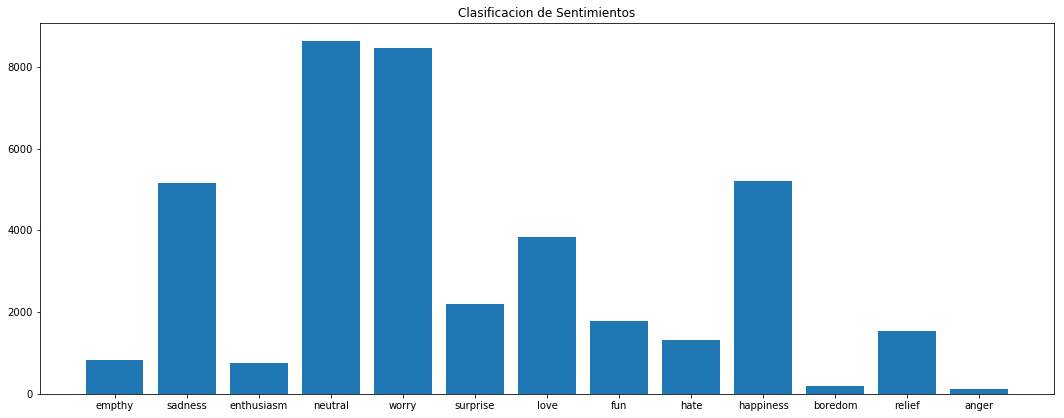

           827     5165     759     8638     8459    2187     3842   1776     1323     5209     179     1526    110


In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(40, 15)) 
ax = plt.subplot2grid((2, 2), (0, 0))
sentiment =["empthy","sadness","enthusiasm","neutral","worry",'surprise','love','fun','hate','happiness','boredom','relief','anger']
em,sa,en,ne,wo,su,lo,fu,ht,hp,bo,re,an= 0,0,0,0,0,0,0,0,0,0,0,0,0
for i in range (len(ds)):
    if ds['sentiment'][i] == 'empty':
        em=em+1
    if ds['sentiment'][i] == 'sadness':
        sa=sa+1
    if ds['sentiment'][i] == 'enthusiasm':
        en=en+1
    if ds['sentiment'][i] == 'neutral':
        ne=ne+1
    if ds['sentiment'][i] == 'worry':
        wo=wo+1
    if ds['sentiment'][i] == 'surprise':
        su=su+1
    if ds['sentiment'][i] == 'love':
        lo=lo+1
    if ds['sentiment'][i] == 'fun':
        fu=fu+1
    if ds['sentiment'][i] == 'hate':
        ht=ht+1
    if ds['sentiment'][i] == 'happiness':
        hp=hp+1
    if ds['sentiment'][i] == 'boredom':
        bo=bo+1
    if ds['sentiment'][i] == 'relief':
        re=re+1
    if ds['sentiment'][i] == 'anger':
        an=an+1
        
datos=[em,sa,en,ne,wo,su,lo,fu,ht,hp,bo,re,an]
xx = range(len(datos))

ax.bar(xx,datos)
ax.set_xticks(xx)
ax.set_xticklabels(sentiment)
plt.title("Clasificacion de Sentimientos")

plt.show(5)
print '          ',em   , '   ', sa ,'   ', en,'   ',ne,'   ',wo,'  ',su,'   ',lo,' ',fu,'   ',ht,'   ',hp,'   ',bo,'   ',re,'  ',an


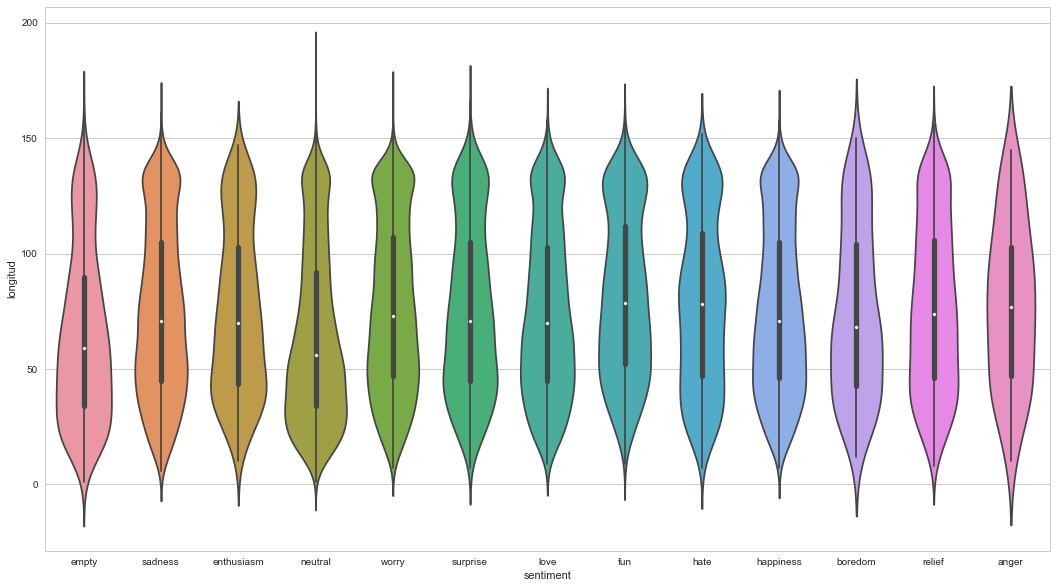

In [19]:
#Usando seaborn
#Gráfico de longitud de los tweets por cada sentimiento
ds['longitud'] = ds['content'].str.len()

melted_df = pd.melt(ds, 
                    id_vars=["tweet_id", "sentiment", "longitud"], 
                    var_name="content")
import seaborn as sns
sns.set_style('whitegrid')

sns.violinplot(x='sentiment', y='longitud', data=ds)
plt.rcParams['figure.figsize']=(18,10)
plt.show()

# Analisis sobre los textos de los tweets

In [16]:
datos2 = ds.drop('tweet_id', axis=1)
#datos2 = datos2.drop('tweet_id', axis=1)
datos2 = datos2.drop('author', axis=1)
datos2 = datos2.drop('review_length', axis=1)
#datos2 = datos2.drop('longitud', axis=1)
datos2 = datos2.drop('sentiment_p1_n0', axis=1)

datos1 = ds.drop('tweet_id', axis=1)
datos1 = datos1.drop('author', axis=1)
datos1 = datos1.drop('review_length', axis=1)
datos1 = datos1.drop('sentiment_p1_n0', axis=1)
datos1 = datos1.drop('sentiment',axis =1)

In [17]:
datos1

,content
0,@tiffanylue i know i was listenin to bad habi...
1,Layin n bed with a headache ughhhh...waitin o...
2,Funeral ceremony...gloomy friday...
3,wants to hang out with friends SOON!
4,@dannycastillo We want to trade with someone w...
5,Re-pinging @ghostridah14: why didn't you go to...
6,"I should be sleep, but im not! thinking about ..."
7,Hmmm. http://www.djhero.com/ is down
8,@charviray Charlene my love. I miss you
9,@kelcouch I'm sorry at least it's Friday?


# Eliminar signos de puntuacion y otros caracteres y pasar todo a minúsculas

In [18]:
import re
pattern = r"[,+]|[:+]|[?+]|[!+]|[-_]|[()]|[=]"
pattern_username = r'(\A|\s)@(\w+)'
pattern_hashtag = r'(\A|\s)#(\w+)'

In [19]:
for index, row in datos2.iterrows():
    cad = datos1.iloc[index]['content']
    cad = re.sub(pattern, "", cad)
    cad = re.sub(pattern_username, "", cad)
    cad = re.sub(pattern_hashtag, "", cad)
    cad = cad.lower()
    datos1.set_value(index, 'content', cad)

In [20]:
datos2.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


# Remover stopwords

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

In [23]:
cant_sw = 0
for index, row in datos2.iterrows():
    cad = datos1.iloc[index]['content']
    lst_pals = cad.split(' ')
    lst_temp = []
    for item in lst_pals:
        if item not in stopWords:
            lst_temp.append(item)
        else:
            cant_sw = cant_sw + 1
    cad = " ".join(lst_temp)
    datos1.set_value(index, 'content', cad)
print("Stopwords removidas: " + str(cant_sw))

Stopwords removidas: 203342


In [24]:
datos1.head()

,content
0,know listenin bad habit earlier started frea...
1,layin n bed headache ughhhh...waitin call...
2,funeral ceremony...gloomy friday...
3,wants hang friends soon
4,want trade someone houston tickets one will.


# Aplicar Stemming

In [25]:
from nltk.stem.porter import *
ps = PorterStemmer()

In [26]:
for index, row in datos1.iterrows():
    cad = datos1.iloc[index]['content']
    lst_pals = cad.split(' ')
    lst_temp = []
    for item in lst_pals:
        stemWord = ps.stem(item)
        if stemWord not in lst_temp:
            lst_temp.append(stemWord)
    cad = " ".join(lst_temp)
    datos1.set_value(index, 'content', cad)

In [27]:
datos1.head()

,content
0,know listenin bad habit earlier start freakin...
1,layin n bed headach ughhhh...waitin call...
2,funer ceremony...gloomi friday...
3,want hang friend soon
4,want trade someon houston ticket one will.


# Aplicar Lemmatization

In [29]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [30]:
for index, row in datos1.iterrows():
    cad = datos1.iloc[index]['content']
    lst_pals = cad.split(' ')
    lst_temp = []
    for item in lst_pals:
        lemWord = lemmatizer.lemmatize(item)
        if lemWord not in lst_temp:
            lst_temp.append(lemWord)
    cad = " ".join(lst_temp)
    datos1.set_value(index, 'content', cad)

In [31]:
datos1.head()

,content
0,know listenin bad habit earlier start freakin...
1,layin n bed headach ughhhh...waitin call...
2,funer ceremony...gloomi friday...
3,want hang friend soon
4,want trade someon houston ticket one will.


#  Generación de los vectores de caracteristicas

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [151]:
tfidf = TfidfVectorizer()
datos_preproces = list(datos1.values.flatten())
X = tfidf.fit_transform(datos_preproces)
X.shape

(40000, 29617)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [152]:
count_vect = CountVectorizer()
Y = count_vect.fit_transform(datos_preproces)
Y.shape

(40000, 29617)

# Clasificacion

In [153]:
y = np.asarray(ds.sentiment_p1_n0.transpose())
y.shape

(40000,)

In [154]:
#Algoritmos de clasificacion
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import NearestCentroid
#from sklearn.ensemble import RandomForestClassifier

In [155]:
def run_model(clf, X, y):
    scores = cross_val_score(clf, X, y, cv=5)
    print("%s accuracy: %0.2f (+/- %0.2f)" % \
          (str(clf.__class__).split('.')[-1].replace('>','').replace("'",''), 
          scores.mean(), scores.std() * 2))

In [156]:
def run_models(X, y):
    run_model(LinearSVC(), X, y)
    run_model(SGDClassifier(), X, y)
    run_model(Perceptron(), X, y)
    run_model(PassiveAggressiveClassifier(), X, y)
    run_model(BernoulliNB(), X, y)
    run_model(MultinomialNB(), X, y)
    #run_model(KNeighborsClassifier(), X, y)
    #run_model(NearestCentroid(), X, y)
    #run_model(RandomForestClassifier(n_estimators=100, max_depth=10), X, y)

In [157]:
run_models(X, y)

LinearSVC accuracy: 0.66 (+/- 0.10)
SGDClassifier accuracy: 0.68 (+/- 0.13)
Perceptron accuracy: 0.61 (+/- 0.06)
PassiveAggressiveClassifier accuracy: 0.64 (+/- 0.09)
BernoulliNB accuracy: 0.68 (+/- 0.11)
MultinomialNB accuracy: 0.67 (+/- 0.11)


# word2vec

In [32]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [33]:
from collections import Counter
vocab = Counter()
for sentence in datos2['content']:
    vocab.update(sentence.split())

In [34]:
vocab.most_common()[:10]

[('to', 14039),
 ('I', 12635),
 ('the', 12052),
 ('a', 9352),
 ('my', 7160),
 ('and', 6750),
 ('i', 6257),
 ('you', 5535),
 ('is', 5254),
 ('for', 5146)]

In [35]:
any([' ' in x for x in vocab])

False

In [36]:
sentences = [x.split() for x in datos2['content']]

In [37]:
num_features = 100
min_word_count = 25
num_workers = 4
context= 6
downsampling = 1e-3

In [38]:
import gensim
from gensim.models import Word2Vec

In [39]:
model = Word2Vec(sentences, workers=num_workers, size=num_features,
             min_count=min_word_count, window=context, sample=downsampling, iter=10)

In [40]:
datos2['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'], dtype=object)

In [41]:
model.most_similar('week')

[('week.', 0.8228025436401367),
 ('year', 0.800700306892395),
 ('week!', 0.7726330757141113),
 ('weekend.', 0.7656015753746033),
 ('week,', 0.7366670370101929),
 ('time.', 0.7323866486549377),
 ('weekend', 0.7268998622894287),
 ('morning.', 0.6941978931427002),
 ('summer', 0.6884631514549255),
 ('month', 0.6798535585403442)]

In [42]:
model.most_similar(positive='glad')

[('Glad', 0.7889938354492188),
 ('sorry', 0.781201958656311),
 ('sorry.', 0.7725827693939209),
 ('good!', 0.7399718761444092),
 ('sorry,', 0.6925520896911621),
 ('afraid', 0.6859045028686523),
 ('sooooo', 0.6824800968170166),
 ('proud', 0.6577117443084717),
 ('sad.', 0.6575632691383362),
 ('sooo', 0.6417723298072815)]

In [43]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set()

In [44]:
vocab = list(model.wv.vocab)
X = model[vocab]

In [45]:
from sklearn.cluster import KMeans
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

In [46]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [48]:
df_plot = pd.concat([pd.DataFrame(X_tsne), pd.Series(vocab)], axis=1)
df_plot.columns = ['x', 'y', 'word']
df_plot['cluster'] = kmeans.labels_

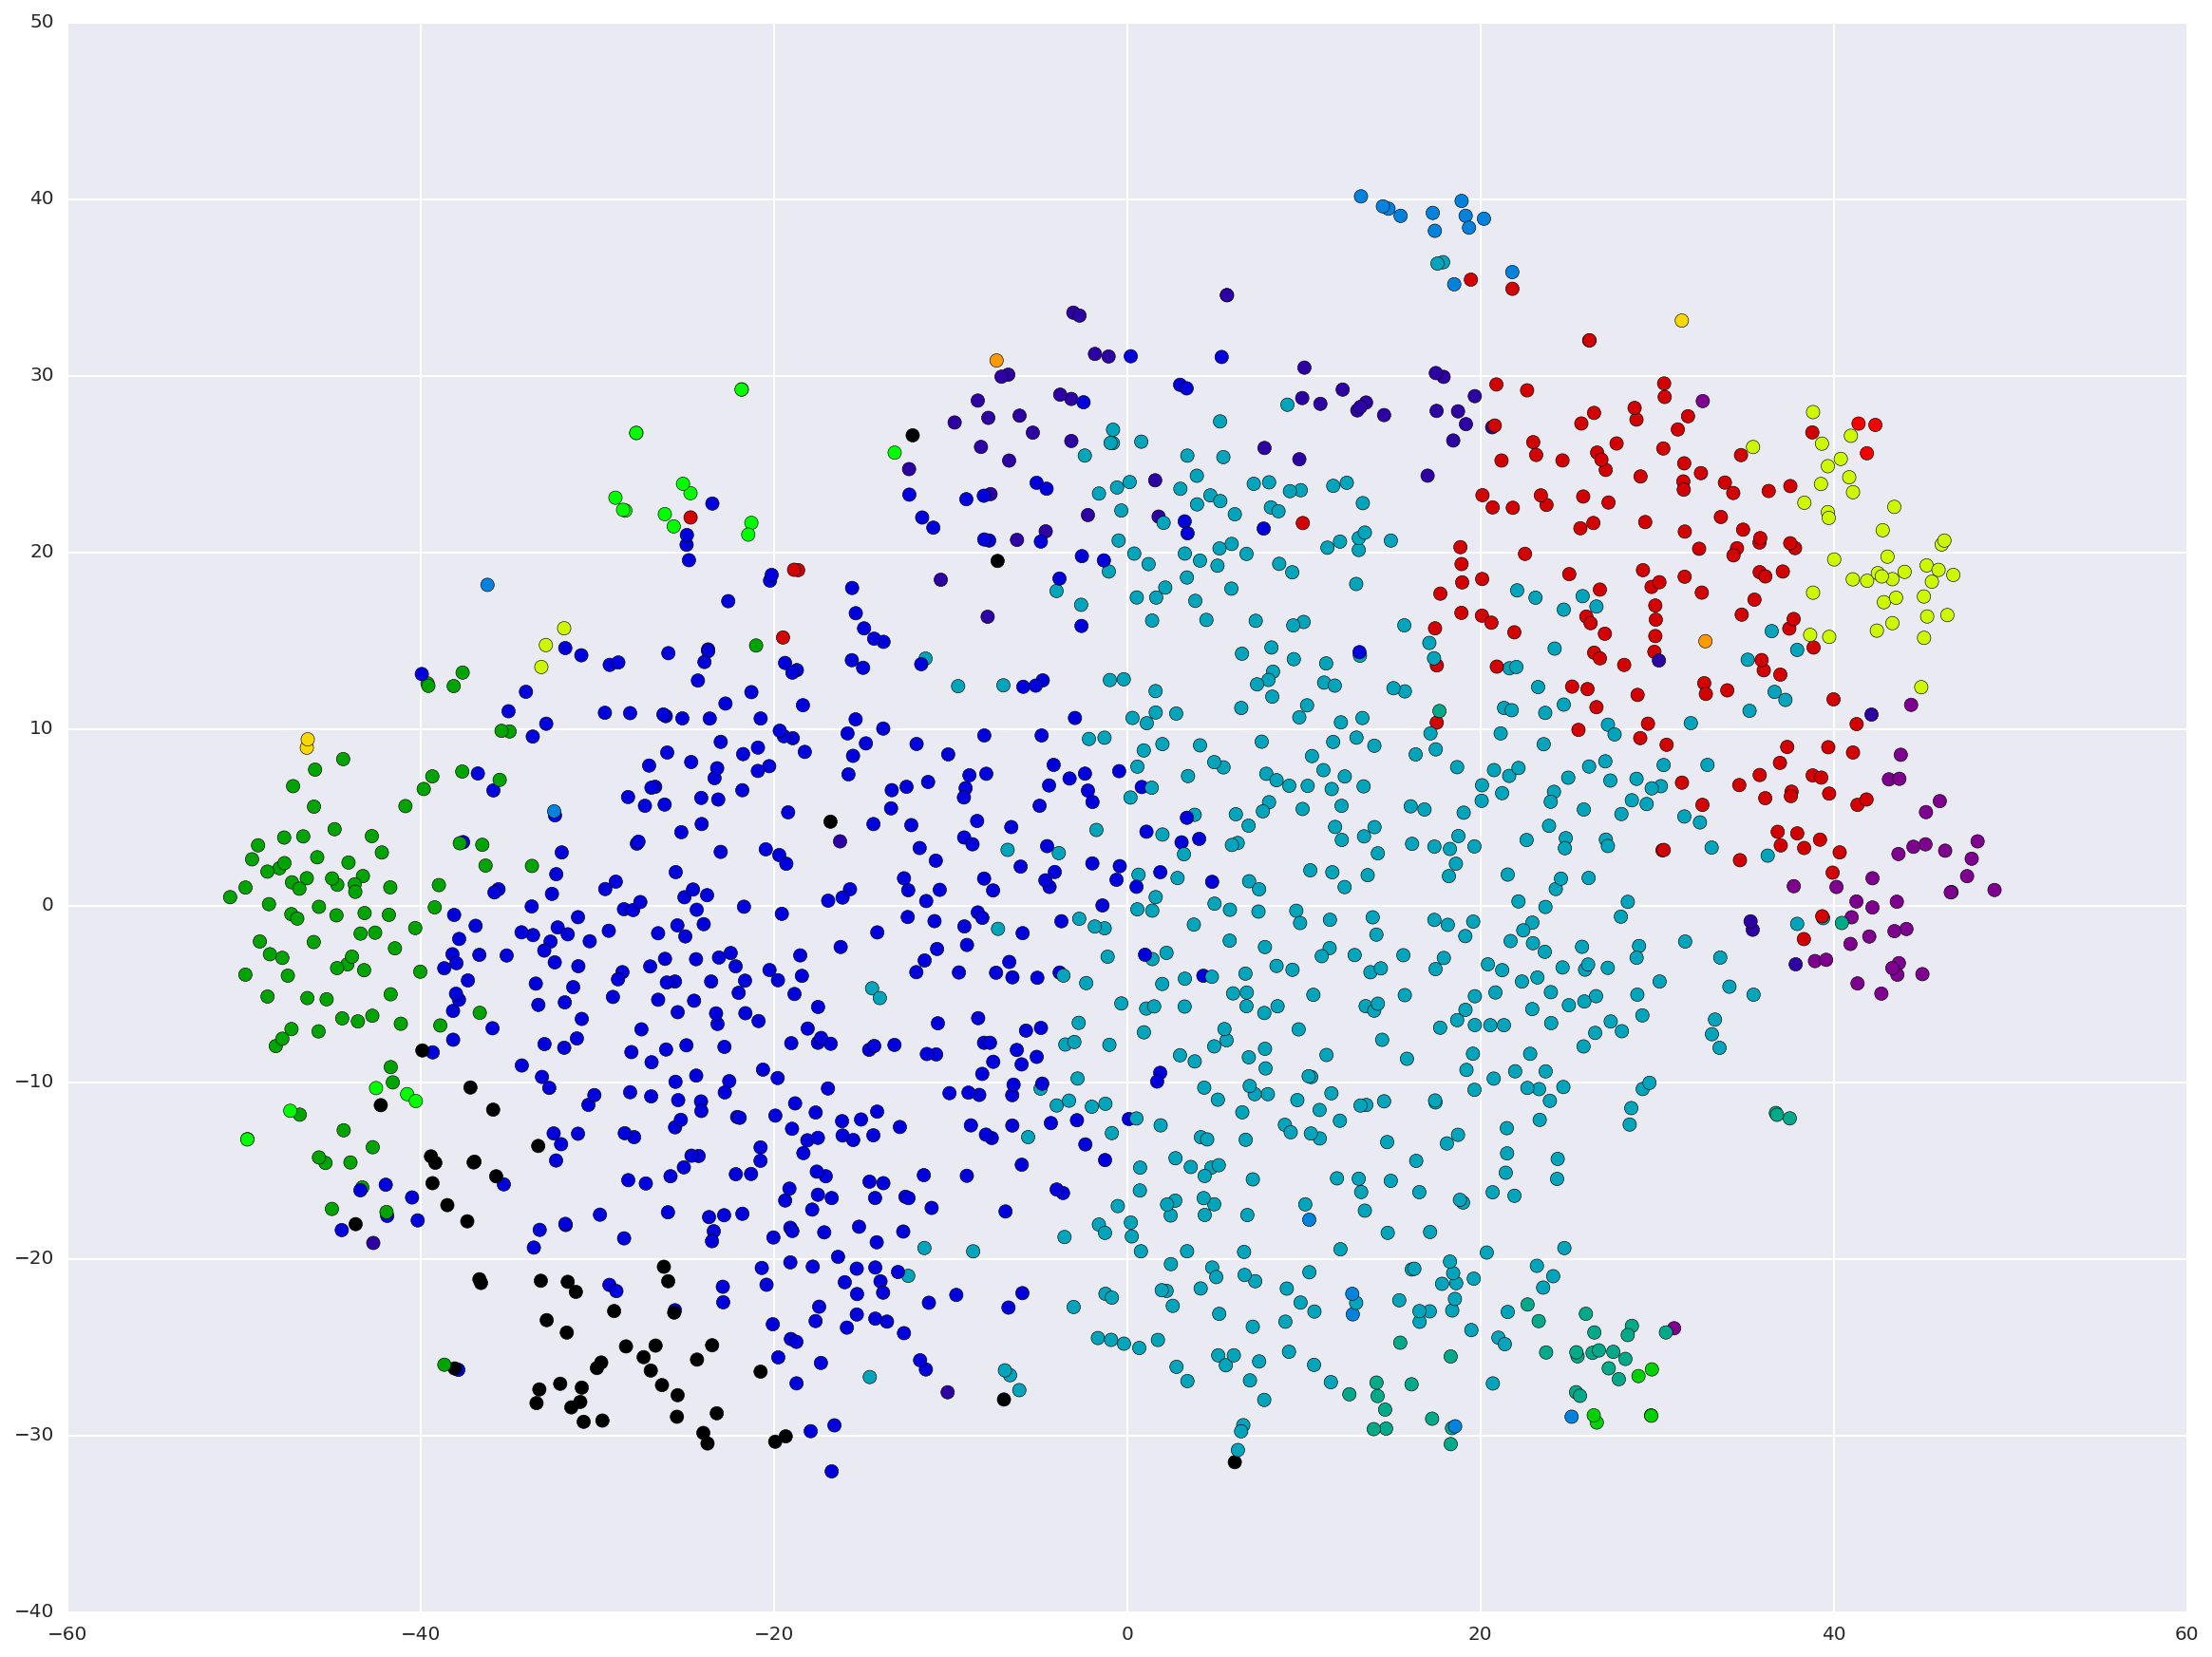

In [49]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(1, 1, 1)
colors = cm.spectral(df_plot['cluster'].astype(float) / n_clusters)
ax.scatter(df_plot['x'], df_plot['y'], marker='.', c=colors, edgecolor='k', s=200)
plt.show()

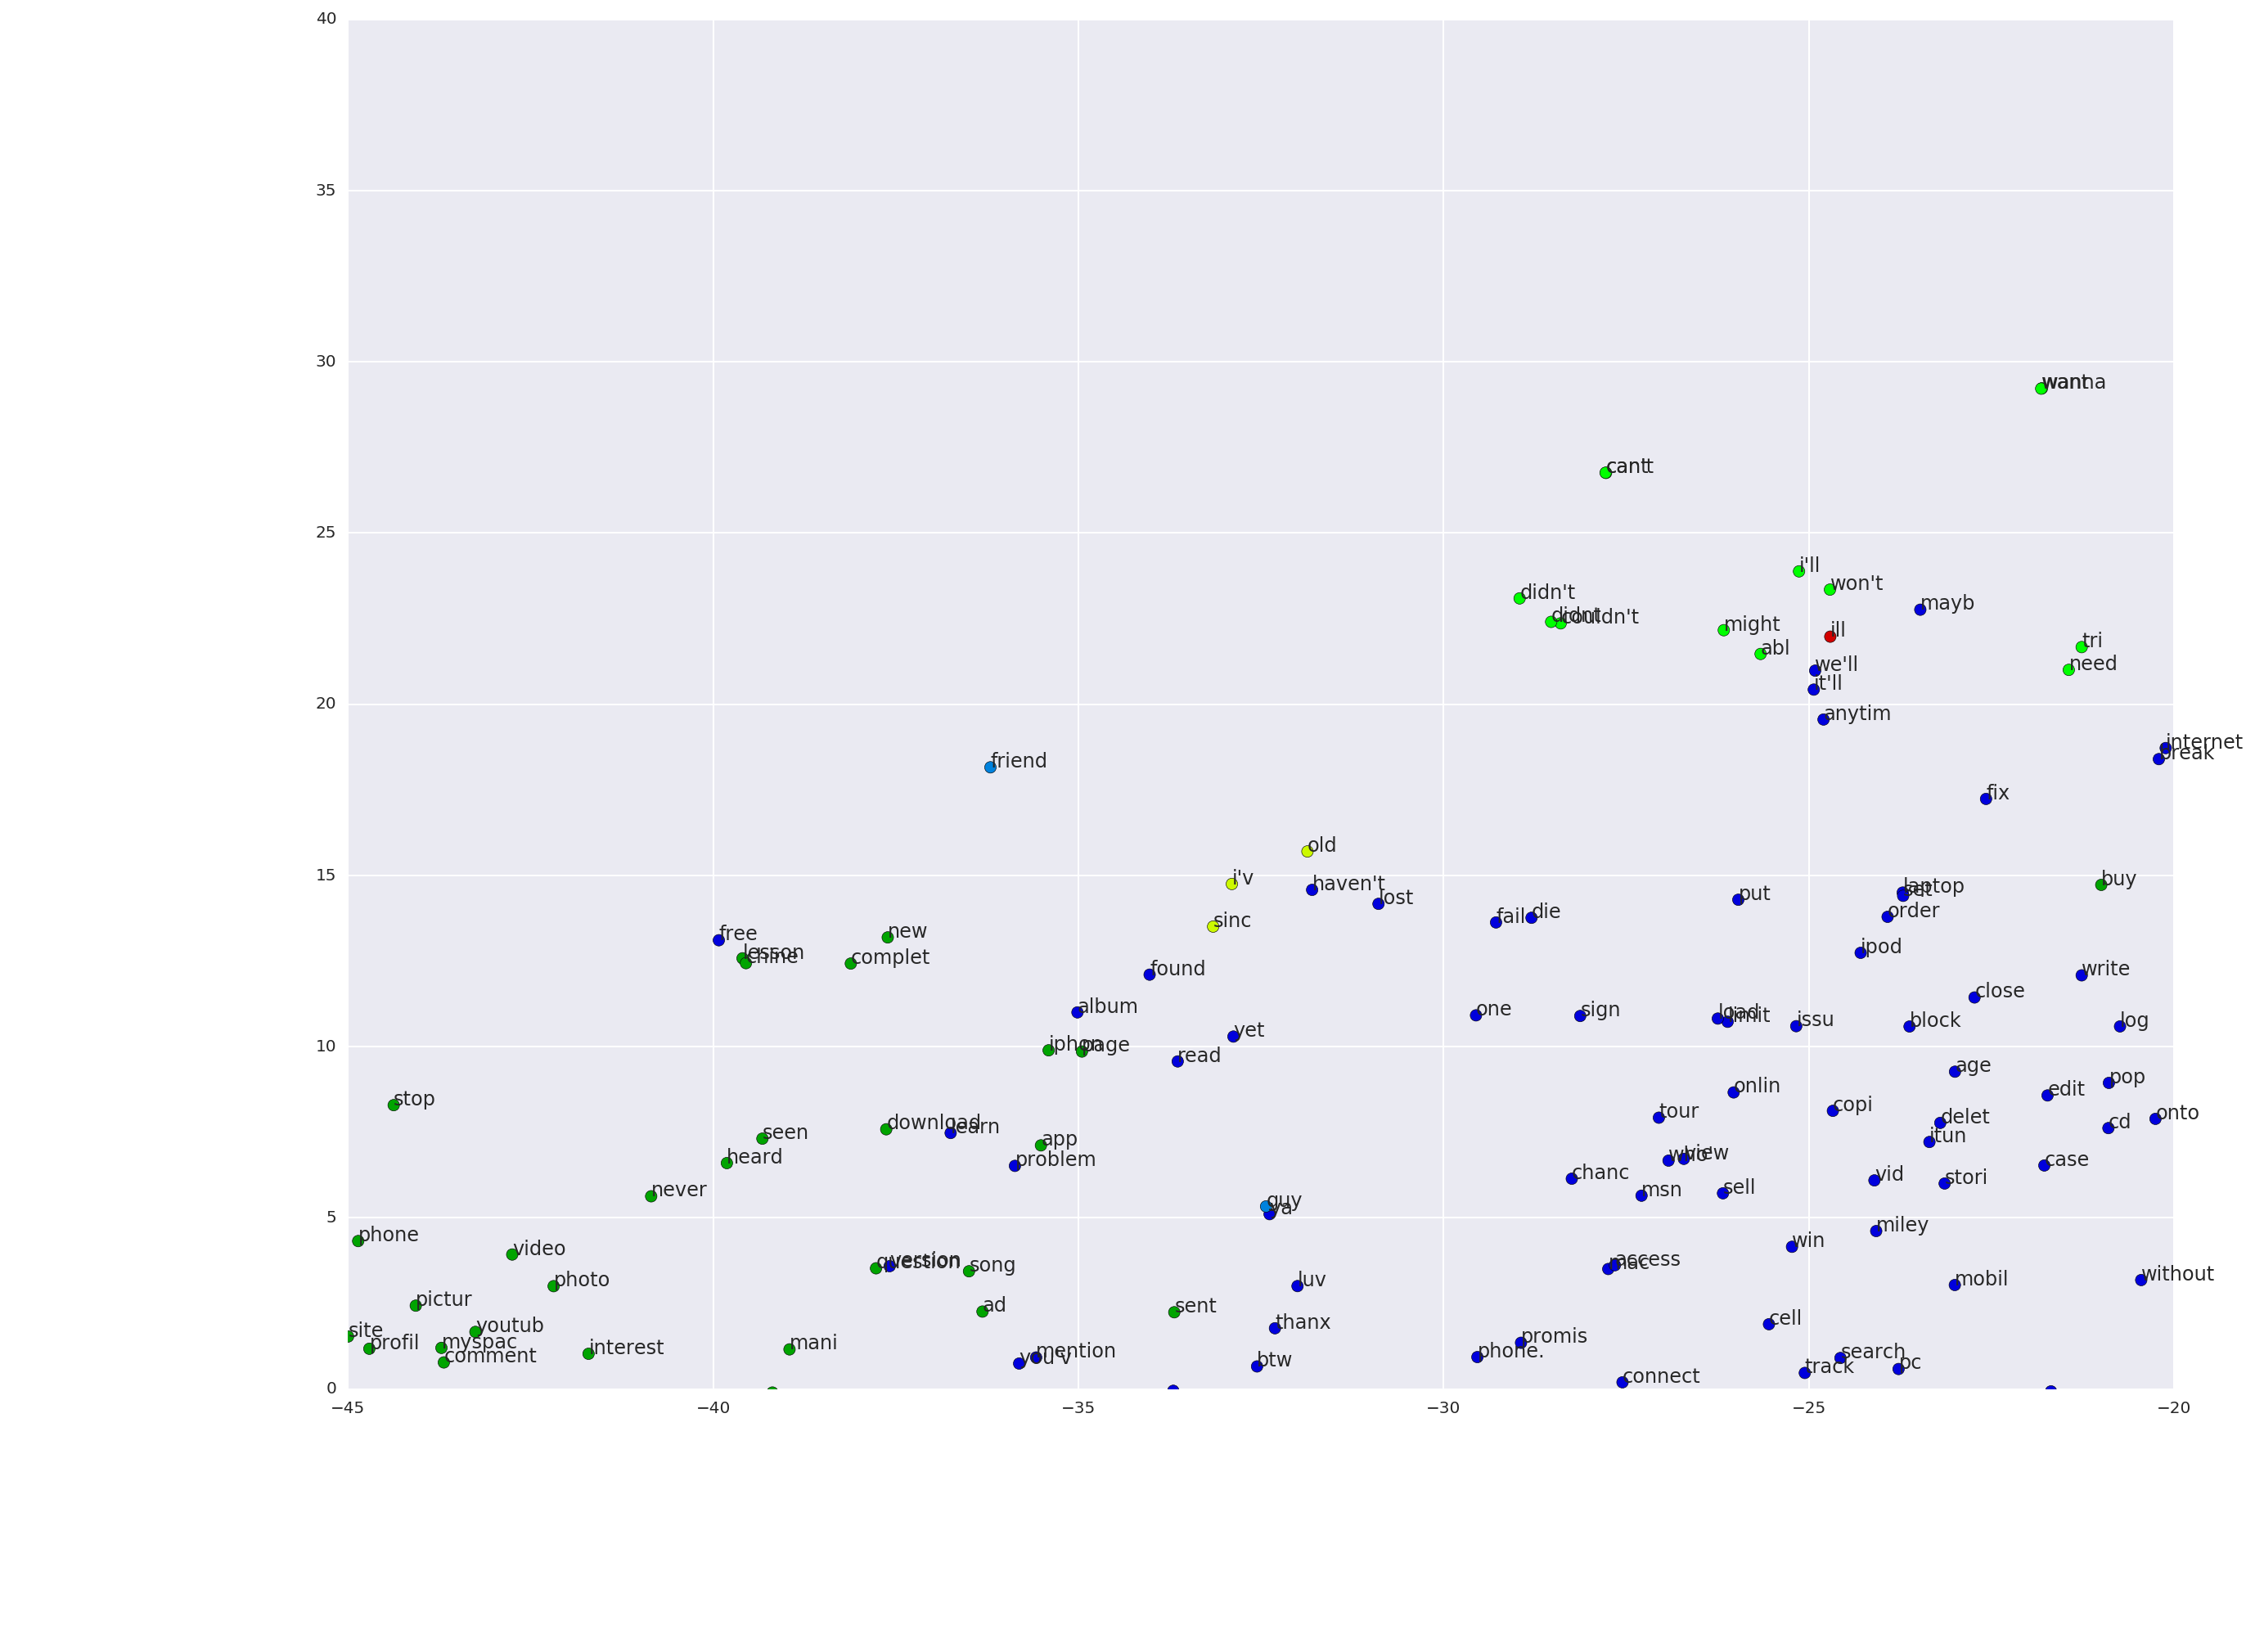

In [50]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_plot['x'], df_plot['y'], marker='.', c=colors, edgecolor='k', s=200)
for i, txt in enumerate(df_plot['word']):
    ax.annotate(txt, (df_plot['x'].iloc[i], df_plot['y'].iloc[i]))
ax.set_xlim([-45, -20])
ax.set_ylim([0, 40])
plt.show()

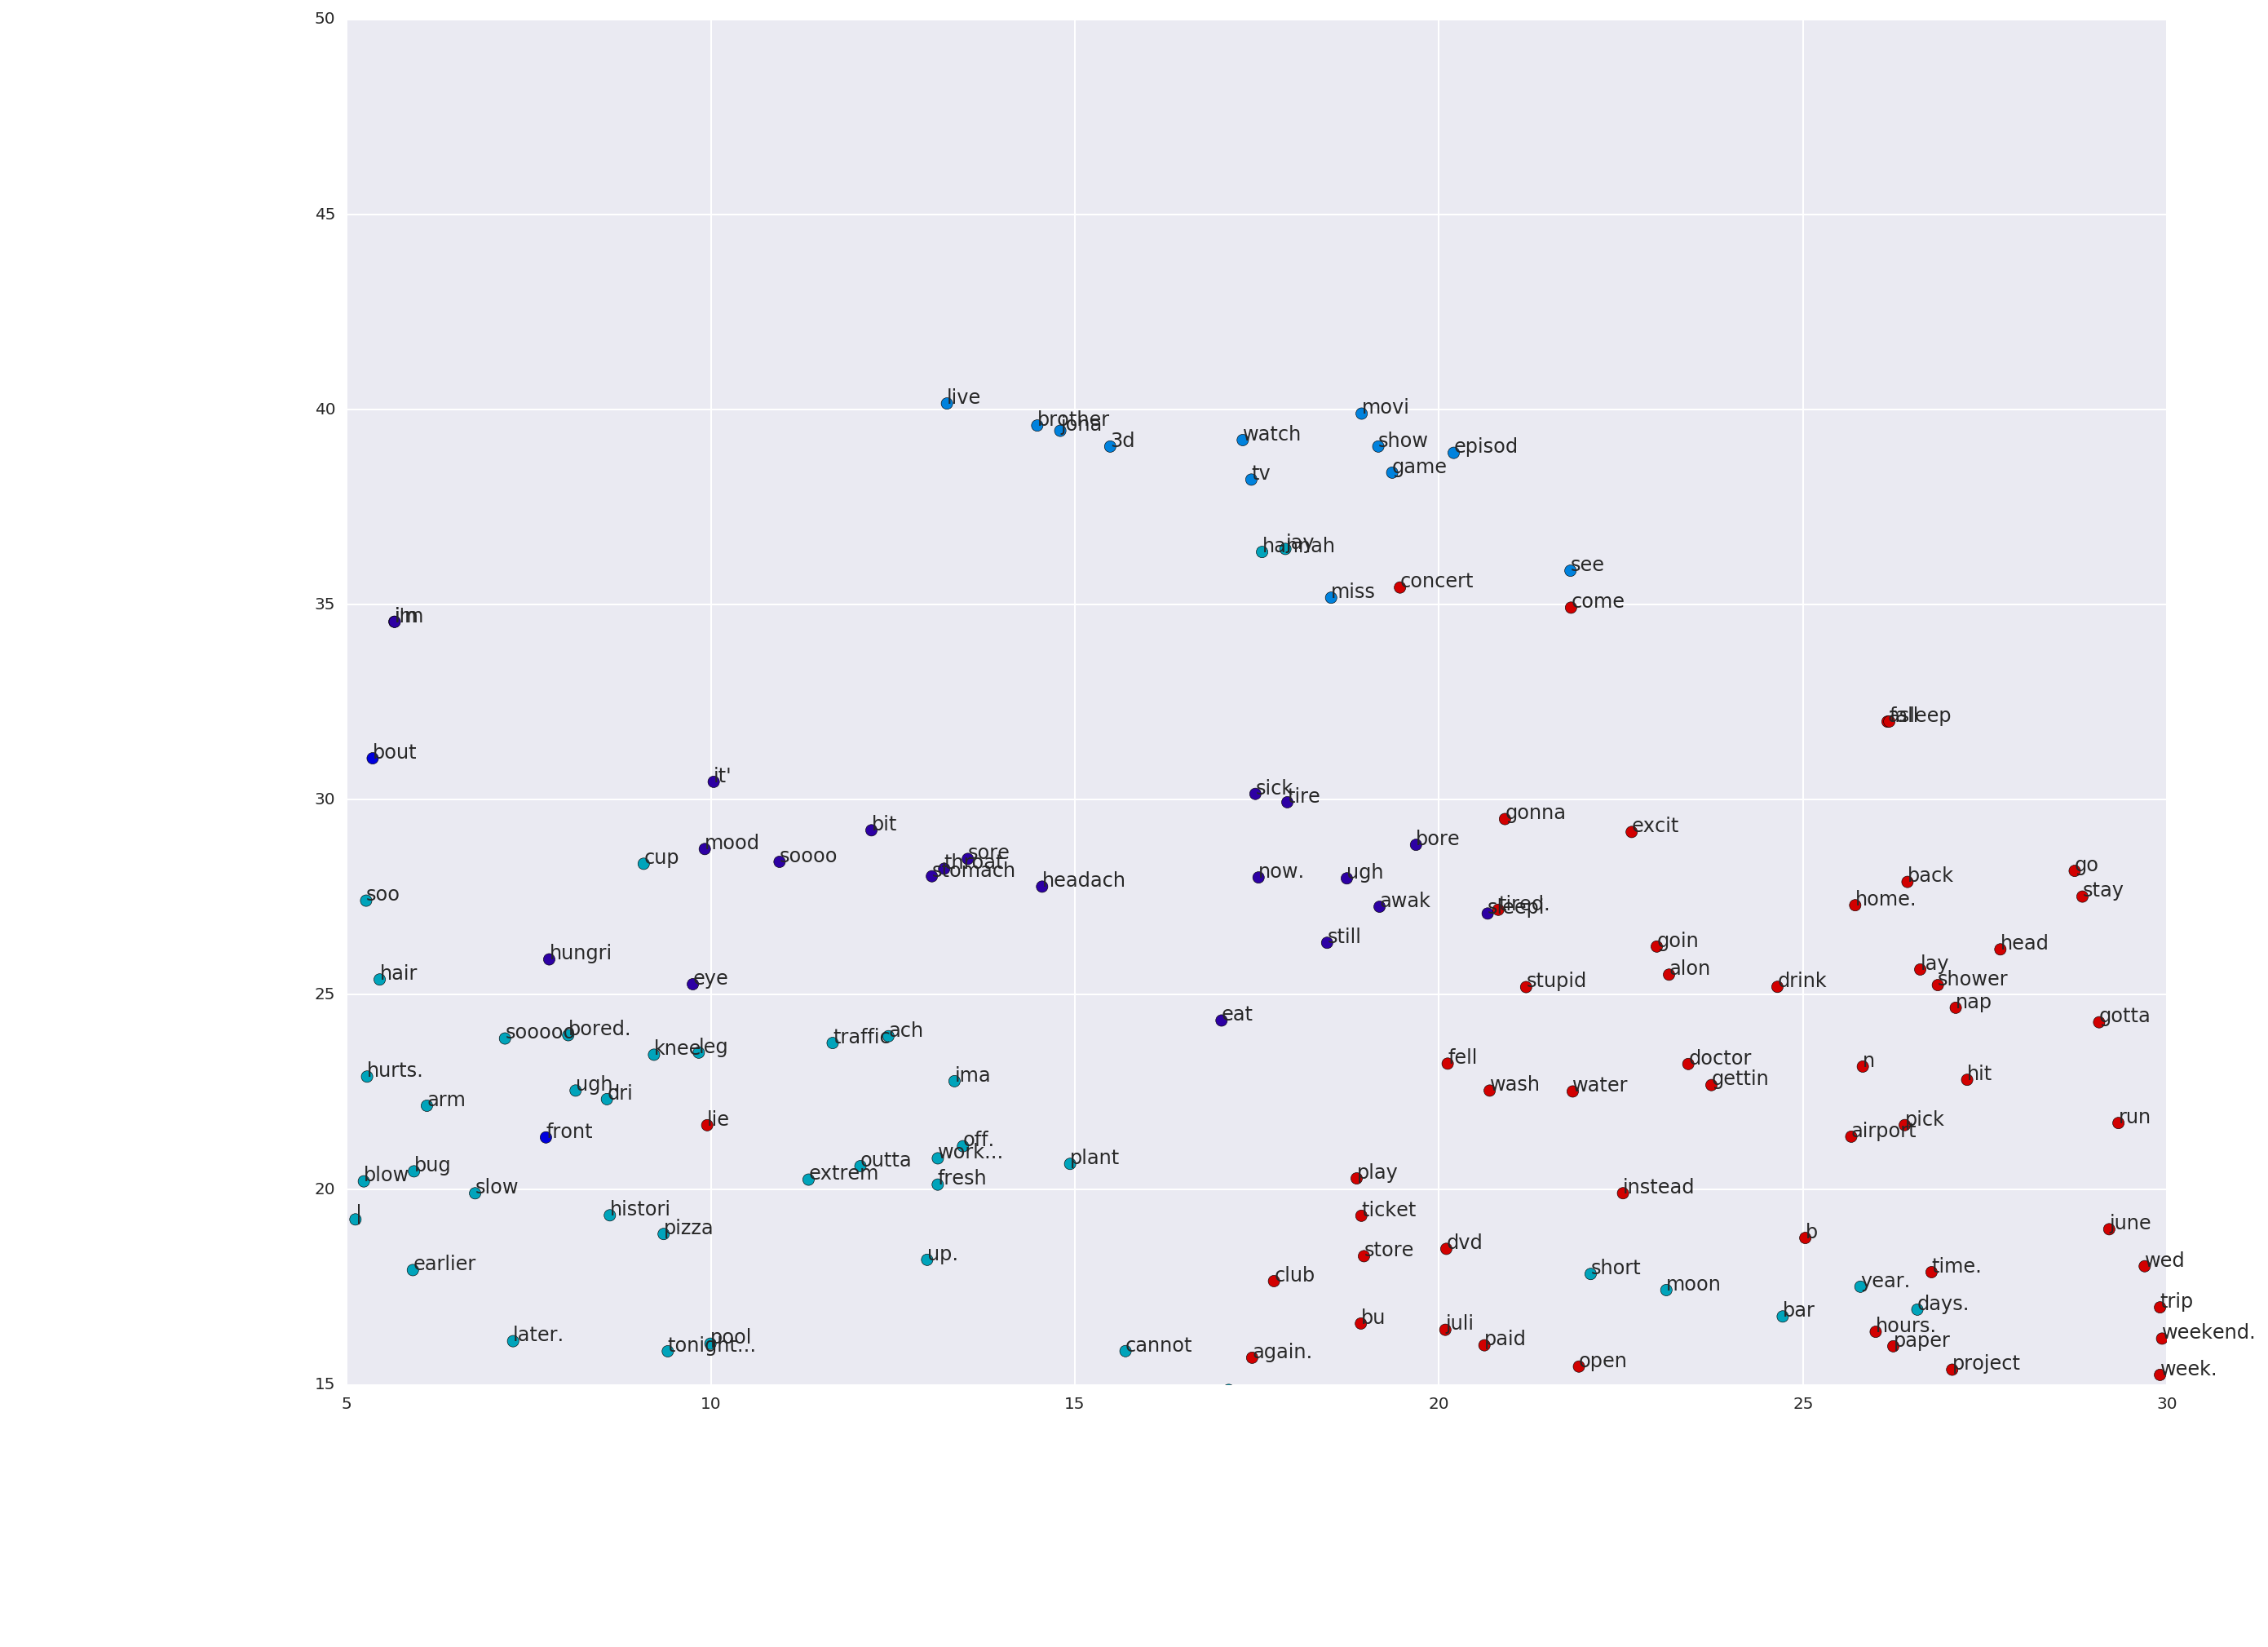

In [51]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_plot['x'], df_plot['y'], marker='.', c=colors, edgecolor='k', s=200)
for i, txt in enumerate(df_plot['word']):
    ax.annotate(txt, (df_plot['x'].iloc[i], df_plot['y'].iloc[i]))
ax.set_xlim([5, 30])
ax.set_ylim([15, 50])
plt.show()

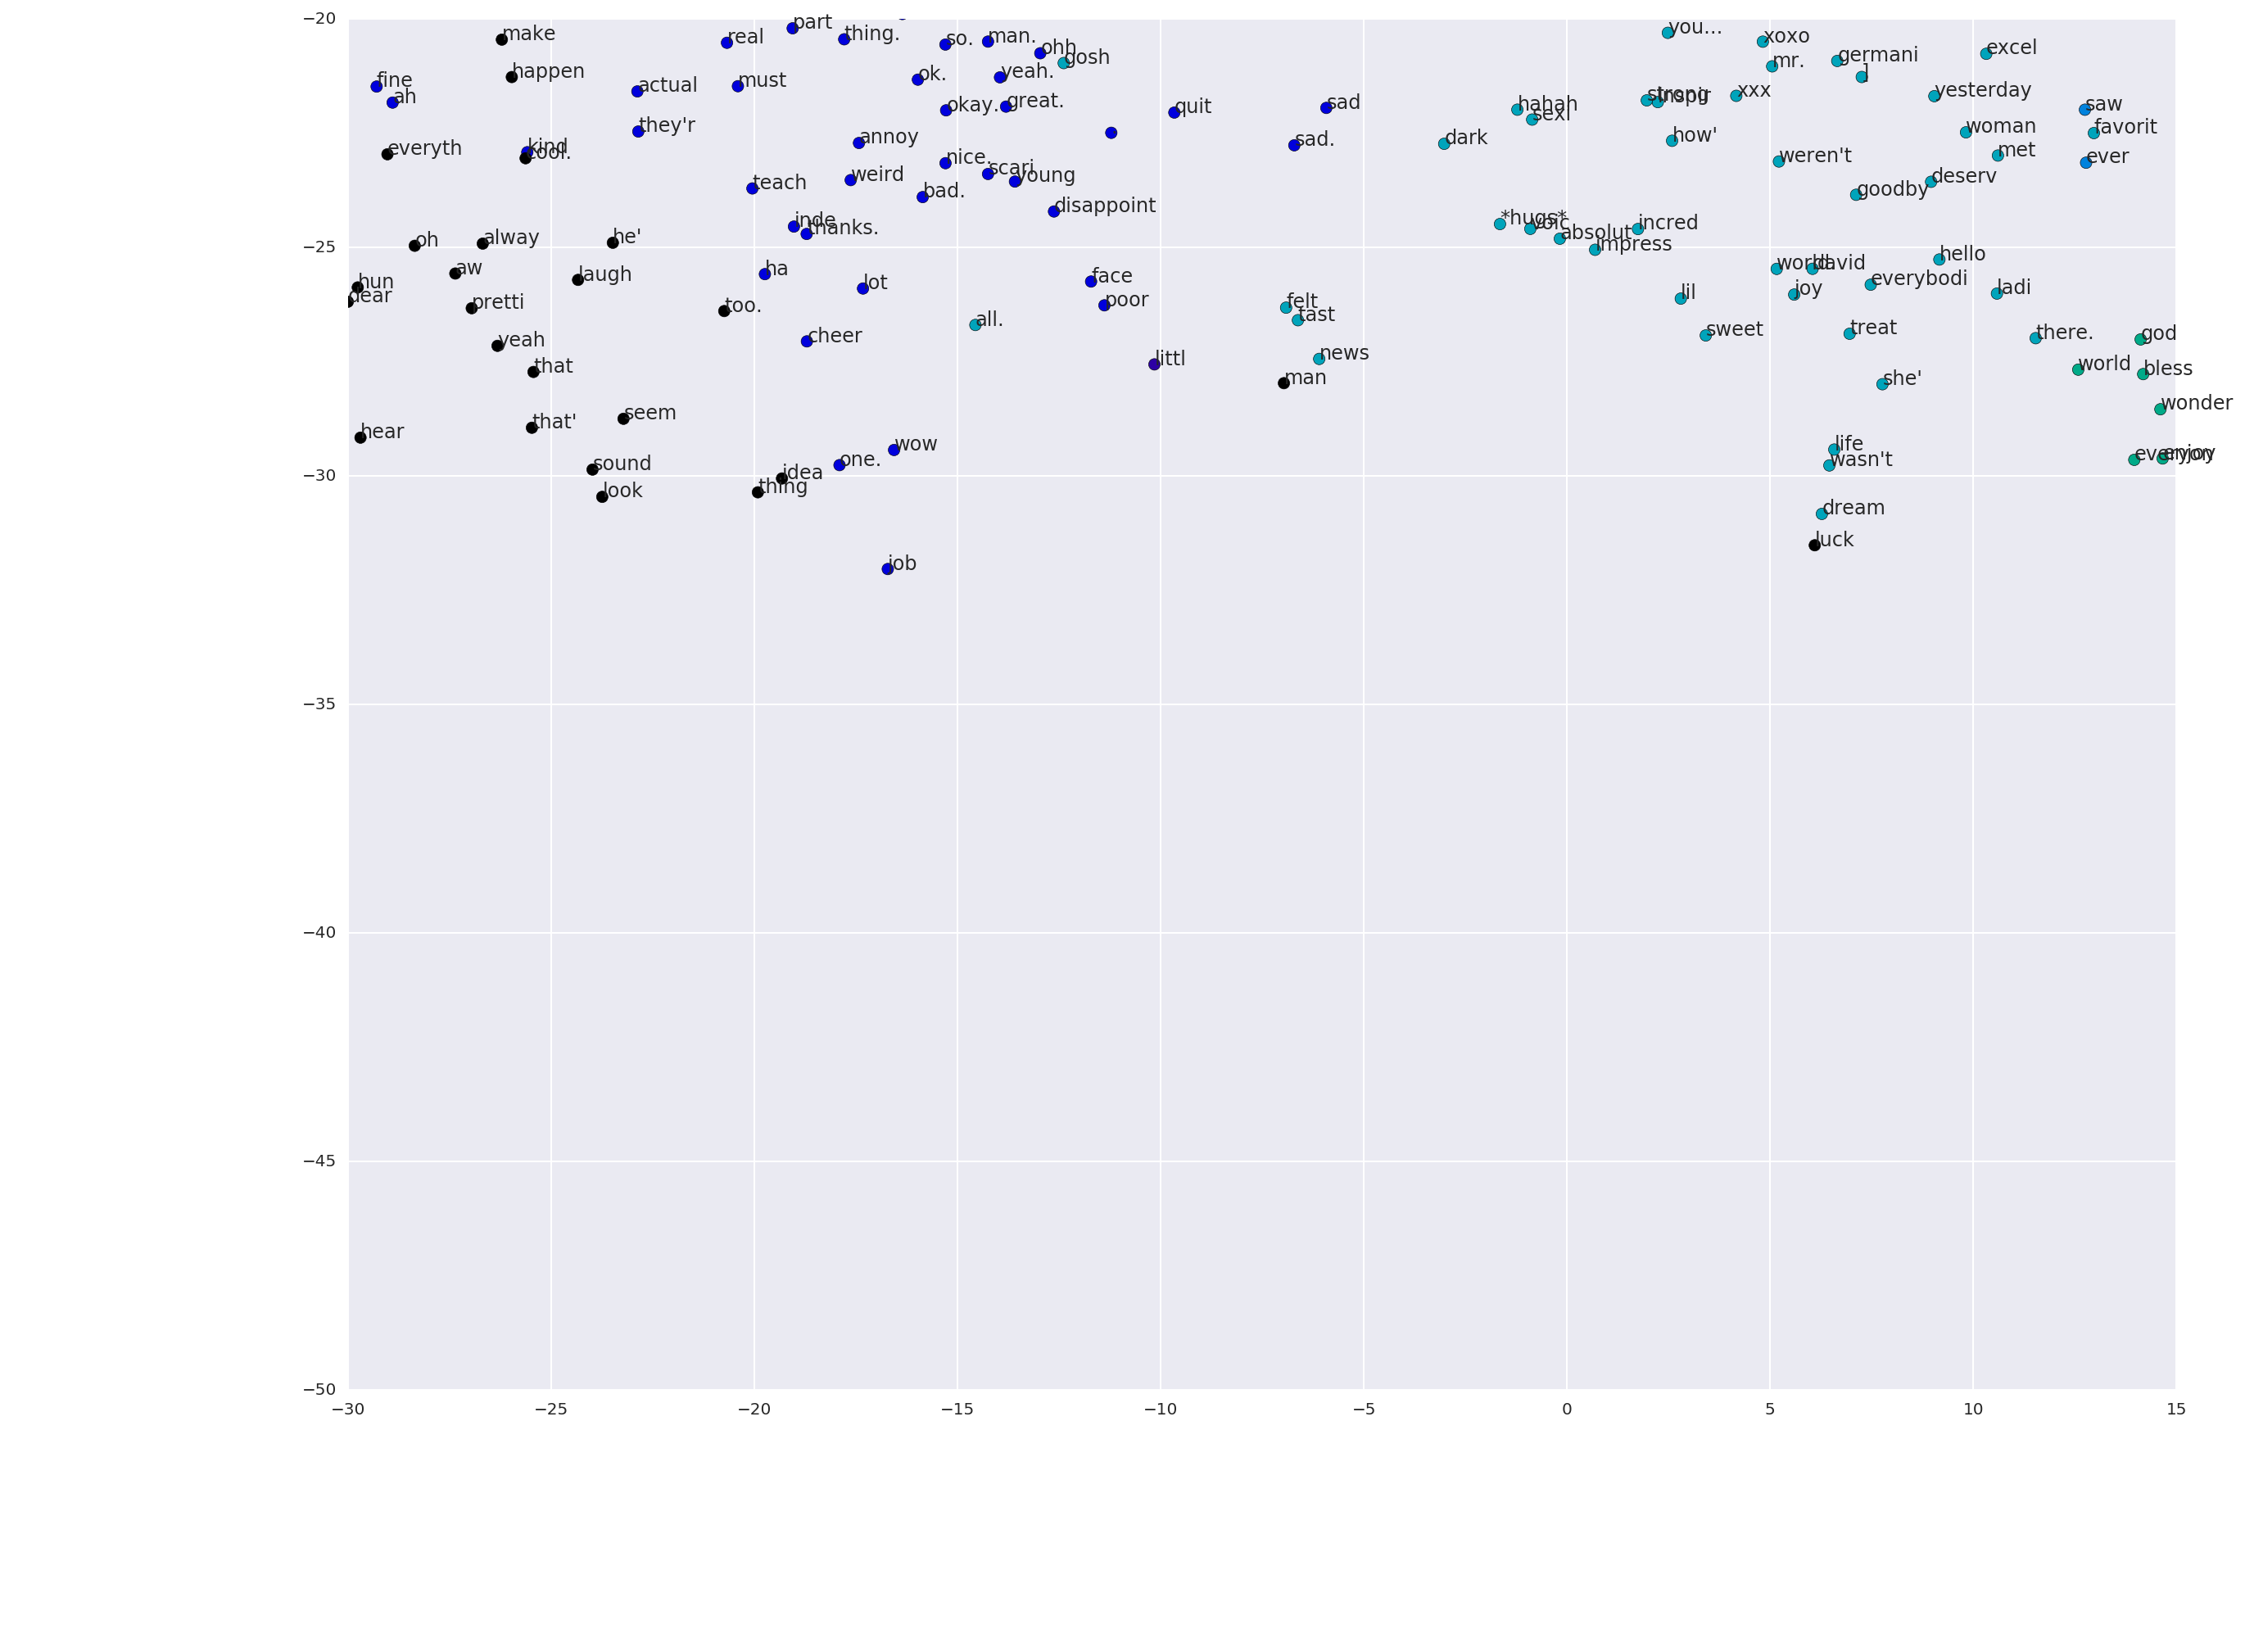

In [52]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_plot['x'], df_plot['y'], marker='.', c=colors, edgecolor='k', s=200)
for i, txt in enumerate(df_plot['word']):
    ax.annotate(txt, (df_plot['x'].iloc[i], df_plot['y'].iloc[i]))
ax.set_xlim([-30, 15])
ax.set_ylim([-50, -20])
plt.show()

In [47]:
datos2.shape

(40000, 2)

In [50]:
def vectorize(model, X):
    return np.array([
        np.mean([model[w] for w in words if w in model] or [np.zeros(100)], axis=0) for words in X
    ])

In [51]:
X_word2vec = vectorize(model, datos2['content'])

In [52]:
X_word2vec.shape

(40000, 100)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X_word2vec, datos2['sentiment'], cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.25 (+/- 0.01)


In [56]:
from xgboost import XGBClassifier
clf = XGBClassifier()
scores = cross_val_score(clf, X_word2vec, datos2['sentiment'], cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.26 (+/- 0.01)


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X_tfidf = vectorizer.fit_transform(datos2['content'])

In [58]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
scores = cross_val_score(clf, X_tfidf, datos2['sentiment'], cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.31 (+/- 0.04)
